# Backpropagation using basic mathematics
In this notebook, I have implemented backpropagation. Here, I have used the dataset http://www.ats.ucla.edu/, where we have to predict student admissions to graduate school at UCLA based on three pieces of data:
* GRE scores
* GPA scores
* Class rank


### loading the dataset

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')
print(data.head(n=10))

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4
5      1  760  3.00     2
6      1  560  2.98     1
7      0  400  3.08     2
8      1  540  3.39     3
9      0  700  3.92     2


### Plotting the data
First let's make a plot of our data to see how it looks. In order to have a 2D plot, without considering the rank.

In [2]:
import matplotlib.pyplot as plt

def plot_points(data):
    X = np.array(data[['gre','gpa']])
    y = np.array(data['admit'])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'blue', edgecolor = 'k')
    plt.xlabel('test gre')
    plt.ylabel('grades gpa')
    
plot_points(data)
plt.show()

<Figure size 640x480 with 1 Axes>

as you can see the isn't that separable, as there are many student who have good grades and test passed, but didn't get admitted. So, let's take the rank into account.

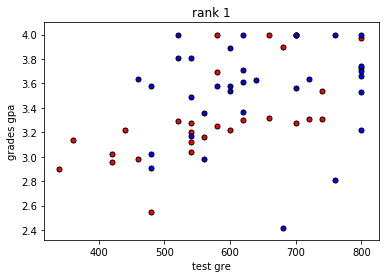

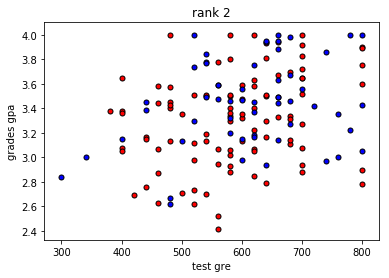

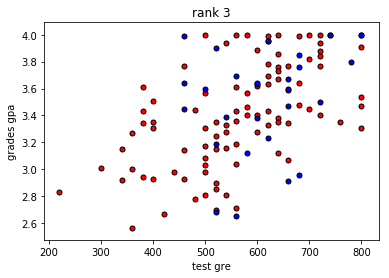

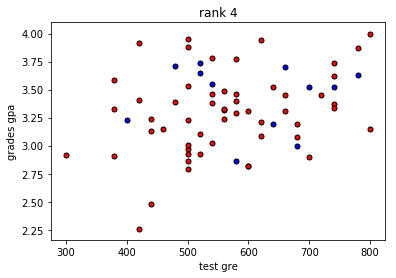

In [3]:
# separating the ranks
rank1 = data[data['rank']==1]
rank2 = data[data['rank']==2]
rank3 = data[data['rank']==3]
rank4 = data[data['rank']==4]


plot_points(rank1)
plt.title("rank 1")
plt.show()

plot_points(rank2)
plt.title("rank 2")
plt.show()

plot_points(rank3)
plt.title('rank 3')
plt.show()

plot_points(rank4)
plt.title("rank 4")
plt.show()

So, students with rank 1, mostly got selected and the students with rank 2 mostly got rejected. But to use the rank as one of our inputs to classify, we have one hot encode it.


### One hot encoding the rank

In [4]:
# create a separate copy of rank column to one hot encoding
one_hot_data = pd.get_dummies(data['rank'])

# droping the rank column from encoded data
new_data = data.drop('rank', axis = 1)

# creating the encoded data
one_hot_data = new_data.join(one_hot_data)

# printing first 10 entries
print(one_hot_data.head(n=10))

   admit  gre   gpa  1  2  3  4
0      0  380  3.61  0  0  1  0
1      1  660  3.67  0  0  1  0
2      1  800  4.00  1  0  0  0
3      1  640  3.19  0  0  0  1
4      0  520  2.93  0  0  0  1
5      1  760  3.00  0  1  0  0
6      1  560  2.98  1  0  0  0
7      0  400  3.08  0  1  0  0
8      1  540  3.39  0  0  1  0
9      0  700  3.92  0  1  0  0


### Scaling the gre and gpa columns
Here, you can see the gre and gpa columns ranges from 200-800 and 1.0 to 4.0 respectively which is much larger. So, our data is skewed and makes it hard for the neural network to handle data with large values. So, we will divide the entries of gre with 800 and gpa with 4.0.

In [5]:
# making the copy
processed_data = one_hot_data[:]

# scaling the data
processed_data['gre'] = processed_data['gre'] / 800
processed_data['gpa'] = processed_data['gpa'] / 4.0

print(processed_data.head(n=10))

   admit    gre     gpa  1  2  3  4
0      0  0.475  0.9025  0  0  1  0
1      1  0.825  0.9175  0  0  1  0
2      1  1.000  1.0000  1  0  0  0
3      1  0.800  0.7975  0  0  0  1
4      0  0.650  0.7325  0  0  0  1
5      1  0.950  0.7500  0  1  0  0
6      1  0.700  0.7450  1  0  0  0
7      0  0.500  0.7700  0  1  0  0
8      1  0.675  0.8475  0  0  1  0
9      0  0.875  0.9800  0  1  0  0


### Spliting the data into training and testing data
we'll split the data into a training and testing set.

In [6]:
# indexes for the training data
sample = np.random.choice(processed_data.index, size = int(len(processed_data)*0.9), replace = False)

# splitting the data using iloc and by droping the data we will get the data for test set
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("number of training sample is ", len(train_data))
print("number of testing sample is ", len(test_data))
print(train_data.head(n = 10),"\n",  test_data.head(n=10))


number of training sample is  360
number of testing sample is  40
     admit    gre     gpa  1  2  3  4
110      0  0.850  0.7700  0  0  0  1
232      0  0.475  0.8450  0  1  0  0
354      1  0.675  0.9450  0  1  0  0
356      0  0.875  0.8175  0  1  0  0
250      0  0.825  0.8275  0  0  0  1
73       0  0.725  1.0000  0  1  0  0
61       0  0.700  0.8300  0  0  0  1
66       0  0.925  0.9050  0  0  0  1
151      0  0.500  0.8450  0  1  0  0
47       0  0.625  0.7425  0  0  0  1 
      admit    gre     gpa  1  2  3  4
2        1  1.000  1.0000  1  0  0  0
9        0  0.875  0.9800  0  1  0  0
19       1  0.675  0.9525  1  0  0  0
33       1  1.000  1.0000  0  0  1  0
39       1  0.650  0.6700  0  0  1  0
89       1  0.825  1.0000  0  1  0  0
102      0  0.475  0.8325  0  0  0  1
124      0  0.900  0.9700  0  0  1  0
126      1  0.750  0.8850  1  0  0  0
134      0  0.700  0.7375  0  1  0  0


### Spliting the train and test data into features and target set

In [7]:
# X_train data
features = train_data.drop("admit", axis = 1)

# y_train data
targets = train_data['admit']

# X_test data
features_test = test_data.drop("admit", axis = 1)

# y_test data
targets_test = test_data['admit']

print(features.head(n=10),"\n", targets.head(n=10))

       gre     gpa  1  2  3  4
110  0.850  0.7700  0  0  0  1
232  0.475  0.8450  0  1  0  0
354  0.675  0.9450  0  1  0  0
356  0.875  0.8175  0  1  0  0
250  0.825  0.8275  0  0  0  1
73   0.725  1.0000  0  1  0  0
61   0.700  0.8300  0  0  0  1
66   0.925  0.9050  0  0  0  1
151  0.500  0.8450  0  1  0  0
47   0.625  0.7425  0  0  0  1 
 110    0
232    0
354    1
356    0
250    0
73     0
61     0
66     0
151    0
47     0
Name: admit, dtype: int64


### training the 2 layer neural network
training the second layer which is activation layer (sigmoid)

In [8]:
# activation function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# derivative of sigmoid
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))

# error formula
def error_formula(y, output):
    return -y*np.log(output) - (1 - y)*np.log(1 - output)

### Backpropagate the error

In [9]:
def error_term_formula(y, output):
    return ((y - output)*output*(1 - output))

In [10]:
# neural network hyperparameter
epochs = 1000
learnrate = 0.5

# training function
def train_nn(features, targets, epochs, learnrate):
    np.random.seed(42)
    # no of rows = records, no of columns = features
    n_records, n_features = features.shape
    last_loss = None
    # initialize the weights with random values
    weights = np.random.normal(scale = 1 / n_features**0.5, size = n_features)
    
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            #   Notice we calulate f'(h) here instead of defining a separate
            #   sigmoid_prime function. This just makes it faster because we
            #   can re-use the result of the sigmoid function stored in
            #   the output variable
            error_term = error_term_formula(y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)
            

Epoch: 0
Train loss:  0.2753225663538534
Epoch: 100
Train loss:  0.21060837265588336
Epoch: 200
Train loss:  0.20906803271465166
Epoch: 300
Train loss:  0.20833195632643223
Epoch: 400
Train loss:  0.20791269605095036
Epoch: 500
Train loss:  0.20762267604894194
Epoch: 600
Train loss:  0.20738881880591709
Epoch: 700
Train loss:  0.2071818613026638
Epoch: 800
Train loss:  0.20698957692089953
Epoch: 900
Train loss:  0.20680659344229693
Finished training!


### Calculating the accuracy on the test data

In [11]:
# Calculate accuracy on test data
tes_out = sigmoid(np.dot(features_test, weights))
# y_hat with greater than 0.5 is considered 1
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.725
